## **Descripción del proyecto**

Trabajamos para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Debemos identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Tenemos datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

**Descripción de los datos**
* `Name` - Nombre
* `Platform` - Plataforma
* `Year_of_Release` - Año de lanzamiento
* `Genre` - Género
* `NA_sales` - ventas en Norteamérica en millones de dólares estadounidenses
* `EU_sales` - ventas en Europa en millones de dólares estadounidenses
* `JP_sales` - ventas en Japón en millones de dólares estadounidenses
* `Other_sales` - ventas en otros países en millones de dólares estadounidenses
* `Critic_Score` - máximo de 100
* `User_Score` - máximo de 10
* `Rating` - ESRB

Plan a seguir:
* Paso 1. Inicialización - Carga de datos y exploracion de datos iniciales
* Paso 2. Preparar los datos
* Paso 3. Analizar los datos
* Paso 4. Crear un perfil de usuario para cada región
* Paso 5. Prueba de hipótesis
* Paso 6. Conclusión general

## Inicialización

Comenzamos realizando los primeros pasos para dar un primer vistazo a nuestros datos.

In [1]:
#Cargamos librerias
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
import math
from functools import reduce
import matplotlib.pyplot as plt
from scipy.stats import levene
from scipy import stats
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#Cargamos los archivos de datos
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('/content/games.csv')

In [3]:
# previsualizar los datos cargados
data.info()

# devolver las n filas superiores del dataframe
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Visualizar estadisticas descriptivas
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Conclusiones
* Notamos que los nombres de nuestras columnas tienen una combinación de mayusculas y minusculas, debemos cambiarlo para mantener coherencia.
* Las columnas `genre`,`name`,`platform` deben cambiarse a `string`
* La columna `Year_of_Release` debe ser `int`
* Hay valores ausentes en `Year_of_Release`, `Genre`,`Critic_Score`,`User_Score` y `Rating` .

## Preparar los datos
En este paso realizaremos el manejo necesario para que nuestra data este lista para el analisis posterior


### **Corregir nombres de las columnas**

In [5]:
#Corregir los nombres de las columnas
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### **Tratar valores ausentes**

In [6]:
#Validando valores ausentes
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Los valores ausentes en `name` y `genre` parecieran coincidir, validemos si es cierto.

In [7]:
#Validando columnas con "name" y "genre" ausentes
data[data['name'].isnull() | data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ambos valores tienen el nombre y genero ausente, lo cuál no es posible de restaurar por lo que los eliminamos. Esto debe haber sido un error de sistema.


In [8]:
#Eliminamos valores
data.drop(labels=[659, 14244], inplace=True)

In [9]:
#imputando la columna "years_of_release" usando la fecha de otras plataformas para el mismo juego
data['year_of_release'] = data['year_of_release'].fillna(round(data.groupby('name')['year_of_release'].transform('median'),0))

In [10]:
#Validando valores ausentes
data.isnull().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

* Aún nos quedan valores ausentes en `years_of_release`, `critic_score` , `user_score` y `rating`. 
* Los valores ausentes `critic_score` y `user_score` son juegos que probabablemente fueron lanzados recientemente y están a la espera de los valores de criticas, mientras que para `rating` probablemente no han recibido clasificación ESRB, ya sea porque son juegos muy antiguos, está pendiente o no les interesa recibirla (ya que es voluntaria pero recomendable).
* No podemos cambiar los valores ausentes en `critic_score` , `user_score` y `rating` a 0's o reemplazar por la media/mediana ya que no nos estarían entregando valores representativos, por lo que mantendremos los valores ausentes de `critic_score` y `user_score`, mientras que para `rating` los reemplazaremos por `unknown`.
* Los valores ausentes en `years_of_release` probablemente son algún error de introducción de datos o datos que se introdujeron antes de la fecha de lanzamiento del juego y recibieron criticas de beta testers, por lo que no se completo toda la información. Estos datos son pocos comparado con el total de nuestros datos, pero pudimos imputar algunos considerando que hay juegos multiplataforma y que para algunos si tenemos la informacion de lanzamiento en al menos una plataforma. Recuperamos los datos de `years_of_release` para los casos que sea posible y procederemos a eliminar los que no.

In [11]:
#Eliminando valores ausentes en "years_of_release"
data = data[data['year_of_release'].notna()]

In [12]:
#Reemplazando valores ausentes en "rating" por "unknown"
data['rating'] = data['rating'].fillna('unknown')

In [13]:
#Validando valores ausentes
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating                0
dtype: int64

Aparentemente, solo nos quedan los valores ausentes que decidimos mantener, pero inicialmente fuimos informados que nuestra columna `user_score` maneja la abreviatura `TBD` para referirse a datos aún por determinar. Como anteriormente decidimos mantener valores ausentes en ambas columnas referentes a las criticas, convertiremos estos valores como valores ausentes para mantener coherencia.
Tambien validaremos si hay valores como 0 en algunas columnas que pudiesen considerarse valores ausentes.

In [14]:
#Convertimos valores "TBD" a valores ausentes
data.loc[data['user_score'] =='tbd', 'user_score'] = np.nan

In [15]:
def cero(data):
    for row in data:
        print(row,len(data[data[row]== 0]))

cero(data)

name 0
platform 0
year_of_release 0
genre 0
na_sales 4468
eu_sales 5800
jp_sales 10407
other_sales 6527
critic_score 0
user_score 0
rating 0


Solo tenemos ceros en las columnas de ventas, que tiene sentido ya que hay videojuegos que solo salen a la venta en algunas regiones.

### **Convertir tipos de datos**

Ya que tratamos nuestros valores ausentes, podemos avanzar convirtiendo nuestras columnas al tipo de datos más conveniente para luego poder facilitar su uso en nuestro analisis. 

En este caso, las columnas `name`, `platform`, `genre` y `rating` necesitan ser strings ya que contienen cadenas de texto, las columna `year_of_release` debe ser datetime ya que contiene años y `user_score` a float ahora que ya no contiene strings en sus datos y solo evaluaciones de los usuarios (que incluyen decimales).

In [16]:
#convirtiendo los datos tipos de datos a string
data['genre'] = data['genre'].astype(str)
data['platform'] = data['platform'].astype(str)
data['name'] = data['name'].astype(str)
data['rating'] = data['rating'].astype(str)

#convirtiendo "year_of_release" a datetime (corregido)
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
#data['year_of_release'] = data['year_of_release'].dt.year

#convirtiendo "year_of_release" a int
data['year_of_release'] = data['year_of_release'].astype(int)
#convirtiendo columnas de criticas a float
data['user_score'] = data['user_score'].astype(float)

In [17]:
#validando que los tipos se hayan aplicado correctamente
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [18]:
# Eliminando duplicados
data = data.drop_duplicates().reset_index(drop=True)

In [19]:
#validando informacion del dataframe
data.info()
# devolver las n filas superiores del dataframe
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


### **Enriquecer datos**

El último paso antes de proceder con nuestro analisis es enriquecer nuestros datos, en este caso calcularemos las ventas totales por juego para poder hacer uso de estos datos posteriormente.

In [20]:
#Calculamos las ventas totales como la suma de las ventas en todas las regiones
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### **Conclusión**

En esta sección preparamos los datos para nuestro analisis, en este caso realizamos:
* Modificación de los nombres de las columnas de datos. poniendolos en minusculas para mantener homogeneidad.
* Nos ocupamos de los valores ausentes en las columnas `name`, `genre`y `year_of_release`, mientras que mantuvimos los valores ausentes de `critic_score` y `user_score` debido a la gran cantidad de valores ausentes y que no tenemos alguna base de datos complementaria que nos ayude a recuperarlos.
* En vista que mantuvimos los datos ausentes en `user_score`, decidimos que los valores "TBD" los consideraríamos datos ausentes, por lo que los convertimos en datos NaN.
* Nos aseguramos de que cada columna tuviera el tipo de dato correcto para no tener problemas en nuestro analisis posterior.
*Enriquecimos nuestros datos añadiendo una columna de ventas totales a nuestro DataFrame

## **Analizar los datos**

Se nos dieron varias tareas para poder identificar patrones que identifiquen si un juego tendrá éxito:

* Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
* Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
* Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
* ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
* Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
* Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
* Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
* Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

En este punto abordaremos las preguntas planteadas

### **Juegos lanzados por año**

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

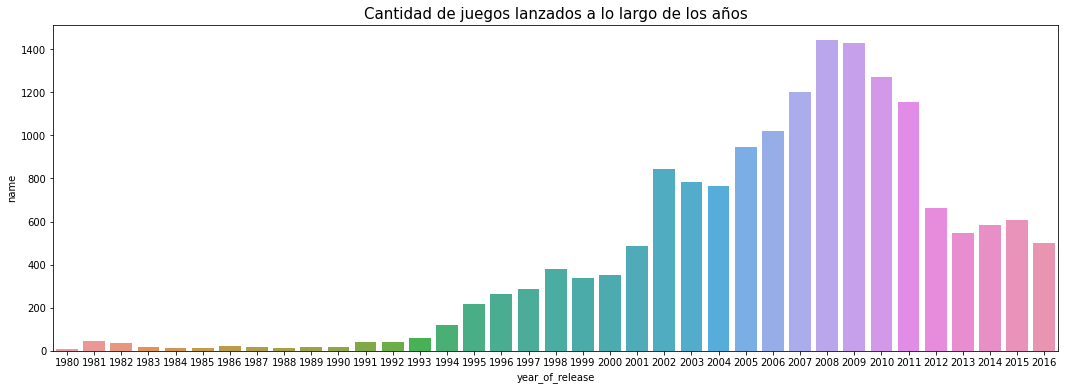

In [21]:
#Agrupando nuestros datos por año
games_per_year = data[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release',ascending=False).reset_index()
#Graficando nuestros datos agrupados en un barplot
fig, gamespy = plt.subplots(figsize=(18, 6))
gamespy.set_title("Cantidad de juegos lanzados a lo largo de los años", fontdict={'size':15})
sns.barplot(data=games_per_year,x='year_of_release',y='name',ax=gamespy)
plt.show()

* Del grafico anterior podemos ver que la industria de los videojuegos comenzo a crecer lentamente en 1995 y alcanzó su punto máximo en el 2008-2009. 

* La cantidad de datos anterior al 2000 son significativamente menores que los datos posterior al 2000, probablemente debido a la evolución y adopción de las tecnologías de Internet.

* Después de 2008, hubo una tendencia a la baja de lanzamientos de juegos por año que se estabilizó entre 500 y 600 juegos en los últimos años de 2013 a 2016.



### **Ventas por plataforma**

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

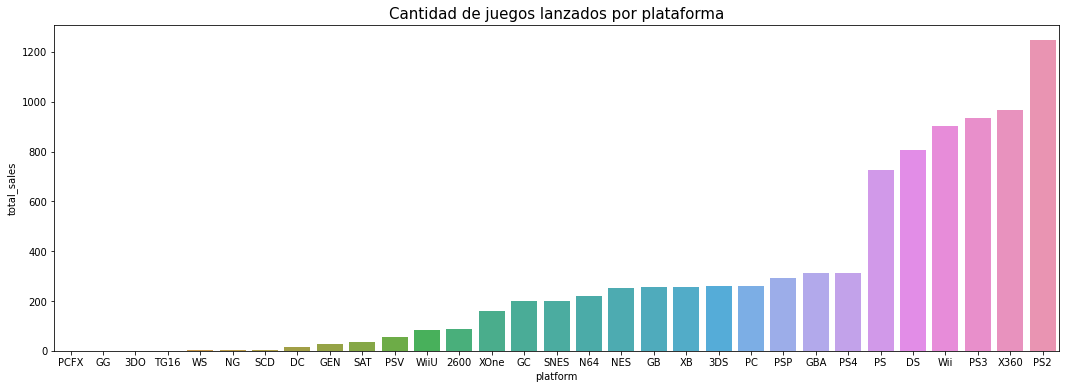

In [22]:
#Agrupando nuestros datos por plataforma
platform_total_sales = data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
#Graficando nuestros datos agrupados en un barplot
fig, gamespp = plt.subplots(figsize=(18, 6))
gamespp.set_title("Cantidad de juegos lanzados por plataforma", fontdict={'size':15})
sns.barplot(data=platform_total_sales,x='platform',y='total_sales',ax=gamespp)
plt.show()

Como vemos en el gráfico de barras las plataformas con mayores ventas son PS2 y X360.

Seleccionaremos el top 6 para realizar un analisis del crecimiento de las plataformas a lo largo de los años.

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


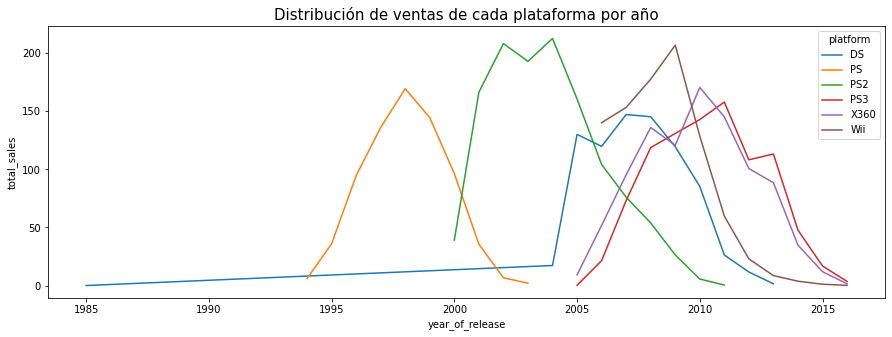

In [23]:
#Seleccionamos el top 6 de ventas por plataforma
top_platforms = platform_total_sales.sort_values(by='total_sales', ascending=False).head(6)['platform'].tolist()
print(top_platforms)
#Graficando nuestros datos en un barplot
fig, gamestp = plt.subplots(figsize=(15, 5))
gamestp.set_title("Distribución de ventas de cada plataforma por año", fontdict={'size':15})
sales = (data[data.platform.isin(top_platforms)].groupby(['year_of_release','platform']).total_sales.sum().reset_index())
sns.lineplot(data=sales, x="year_of_release", y='total_sales', hue="platform");

Todas nuestras lineas indican que las plataformas más rentables tienden a tener una distribucion ascendente y descendente paulatina en un periodo de 10 años, alcanzando su punto maximo en terminos de ventas a mediados de su vida (a los 5-6 años). 

Analicemos que plataformas solían ser populares pero que hoy (2016) no tienen ventas.

In [24]:
#Seleccionando juegos lanzados el 2016
df_2016 = data[data['year_of_release'] == 2016]['platform'].unique()
#Seleccionando juegos que tienen 0 ventas lanzados el 2016
df_platform = data[(data['total_sales'] >= 0) & ~data['platform'].isin(df_2016)]
#Mostrando plataformas con 0 ventas para juegos lanzados el 2016
print(df_platform['platform'].unique())

['NES' 'GB' 'DS' 'PS2' 'SNES' 'GBA' 'N64' 'PS' 'XB' '2600' 'PSP' 'GC'
 'GEN' 'DC' 'SAT' 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Las plataformas que hoy tienen cero ventas son: `NES`, `GB`, `DS`, `PS2`, `SNES`, `GBA`, `N64`, `PS`, `XB`, `2600`, `PSP`, `GC`, `GEN`, `DC`, `SAT`, `SCD`, `WS`, `NG`, `TG16`, `3DO`, `GG` y `PCFX`. Analicemos cuáles de estas fueron populares en su tiempo:

In [25]:
zero_sales= platform_total_sales[platform_total_sales['platform'].isin(df_platform['platform'])].sort_values(by="total_sales", ascending=False)
zero_sales

,platform,total_sales
30,PS2,1247.16
26,DS,804.28
25,PS,727.58
23,GBA,313.73
22,PSP,293.57
19,XB,256.69
18,GB,254.43
17,NES,251.05
16,N64,218.48
15,SNES,200.04


Las plataformas más populares que hoy no tienen ventas serían la `PS2`, `DS` y `PS`. 

Analicemos cuanto se tarda en promedio las plataformas en aparecer y en desaparecer:

In [26]:
#Calculando el tiempo de vida de las plataformas
platform_lifetime = data.groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].sum().sort_values(by='year_of_release')
platform_lifetime = platform_lifetime.groupby(['platform'])['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifetime['lifetime']=platform_lifetime['max']-platform_lifetime['min']
platform_lifetime.sort_values(by='max',ascending=False).reset_index(drop=True)

,platform,min,max,lifetime
0,XOne,2013,2016,3
1,PS3,2005,2016,11
2,PS4,2013,2016,3
3,PC,1985,2016,31
4,PSV,2011,2016,5
5,Wii,2006,2016,10
6,WiiU,2012,2016,4
7,X360,2005,2016,11
8,3DS,2000,2016,16
9,PSP,2004,2015,11


In [27]:
#Calculando la mediana de la vida de las plataformas
platform_lifetime['lifetime'].median()

8.0

### **Selección de periodo relevante**

La mediana de vida de una plataforma es de 8 años y como vimos anteriormente suele tomar de 4 a 6 años para que la plataforma llegue a su tope de ventas y es el valor que queremos buscar.

Ante esto, excluiremos los datos de plataformas que hayan superado su tope de beneficios y de ahora en adelante, nos centraremos unicamente en las paltaformas que aún pueden llegar a su mayor alza para 2017, esto significa que excluiremos todos los datos por debajo del 2013.

In [28]:
data_filtered=data[data['year_of_release'] >= 2013]
data_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16555,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16559,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


### **Plataformas potencialmente rentables**

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?

In [29]:
#Agrupamos nuestro df filtrado por plataforma y ordenamos por ventas totales
data_filtered[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()

,platform,total_sales
0,DS,1.54
1,PSP,3.74
2,Wii,13.66
3,PSV,32.99
4,PC,40.06
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43


Podemos ver que la plataforma más rentable desde el 2013 es la `PS4`, seguido de la `PS3` y `XOne`.

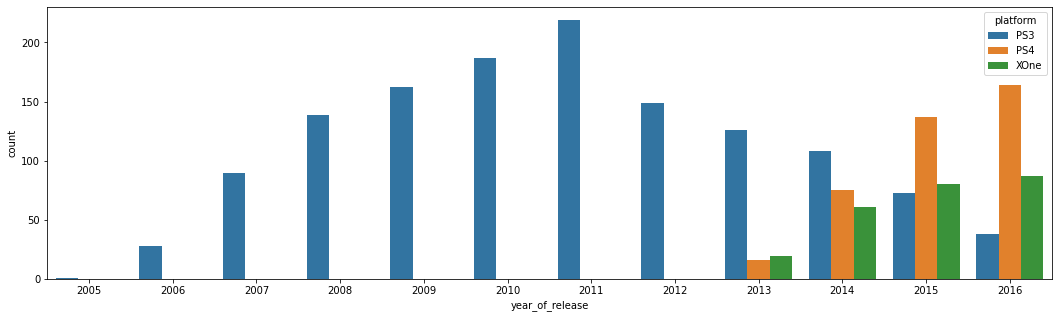

In [30]:
#Separando los datos de cada consola, usaremos el df sin filtrar para
#tener el contexto completo
plat_data = data[(data['platform']=='XOne') | (data['platform']=='PS3') | (data['platform']=='PS4')]

#Graficando las ventas por año de cada plataforma potencialmente rentable

fig, pprofit = plt.subplots(figsize=(18, 5))
sns.countplot(data=plat_data,x='year_of_release', hue='platform')
plt.show()

Podemos ver en el grafico que el tope de ventas de la `PS3` ya pasó y sus ventas están decayendo para el 2013, mientras que la `XOne` y la `PS4` van a la subida. La `PS4` tiene más ventas que la `XOne` pero ambas muestran ser potencialmente rentables para el 2017.

### **Ventas por plataforma del perdiodo relevante**

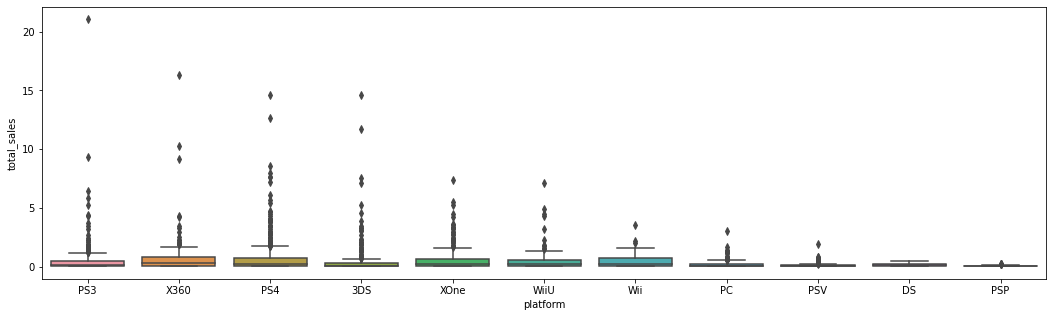

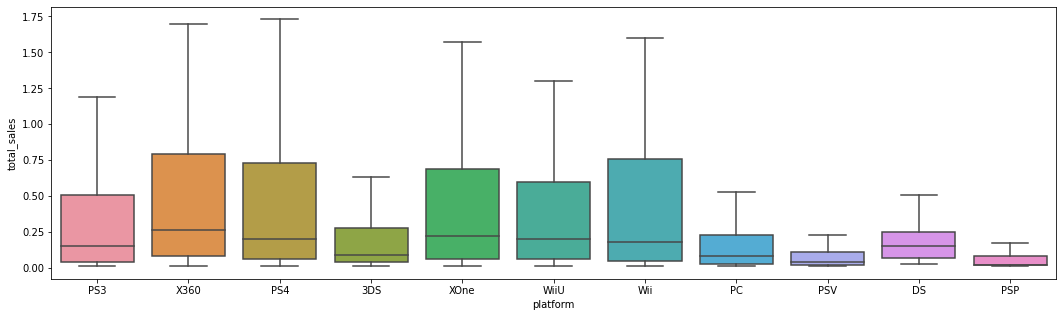

In [31]:
#Realizando un diagrama de caja de las ventas globales desglozado por plataforma
#Incluyendo marcadores de valores atipicos que sobrepasan los bigotes
fig, axes = plt.subplots(figsize=(18, 5))
ax=sns.boxplot(x='platform', y='total_sales', data=data_filtered)
plt.show()
#Excluyendo marcadores de valores atipicos que sobrepasan los bigotes para mejor visibilidad
fig, axes = plt.subplots(figsize=(18, 5))
ax=sns.boxplot(x='platform', y='total_sales', data=data_filtered,showfliers = False)
plt.show()

Vemos que la plataforma con mayores ventas totales promedio es la `X360` la cuál sabemos que es una plataforma que está decayendo y para la cuál ya paso su tope de ventas alrededor del 2010. La `Wii` muestra limites altos pero un promedio relativamente bajo, esto por que tuvo un tope de ventas muy alto y luego un abaja continua que pudimos ver anteriormente.De las plataformas que más nos interesan son la `PS4` y `XOne` que parecen tener limites y valores atípicos relativamente promedio entre plataformas exitosas.

En general, la diferencia en las ventas es significativa y las únicas plataformas rentables que se presentan en el gráfico de caja son `X360`, `PS4`, `XOne` y `Wii`.

La `PS4` y `XOne`, se asemejan entre sí en valores de cuartiles, aunque el valor promedio de `XOne` es más alto que el promedio de `PS4`, el rango de cuartiles de `PS4` es un poco más grande que `XOne` y los valores atipicos de la `PS4` se extienden un poco más.

### **Correlación entre reseñas y ventas**

Analicemos como las opiniones de profesionales y usuarios afectan a las ventas de nuestras plataformas potencialmente relevantes: `PS4` y `XOne`. Para ello realizaremos un DataFrame que muestre la correlación de los datos y lo presentaremos en un grafico de dispersión.

In [32]:
#Separando los datos relevantes para XOne y PS4
xone_data_2013 =  data_filtered[data_filtered['platform']=='XOne']
ps4_data_2013 =  data_filtered[data_filtered['platform']=='PS4']
#Separando los datos a comparar
ps4_scatter = ps4_data_2013[['total_sales','critic_score','user_score']]
xone_scatter =  xone_data_2013[['total_sales','critic_score','user_score']]
ps4_scatter

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7
...,...,...,...
16353,0.01,69.0,7.5
16356,0.01,NaN,NaN
16378,0.01,61.0,7.9
16382,0.01,51.0,5.5


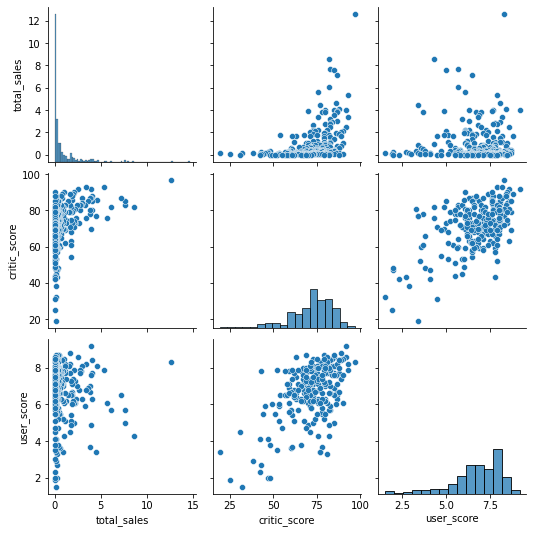

In [33]:
#Generando grafico de dispersión para PS4
sns.pairplot(ps4_scatter)
plt.show()

In [34]:
#Calculando coeficiente de correalción de las columnas para PS4
ps4_scatter.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


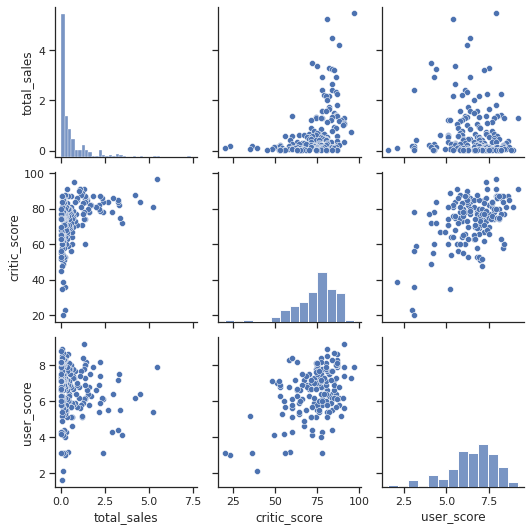

In [35]:
#Generando grafico de dispersión para XOne
sns.set_theme(style="ticks")
sns.pairplot(xone_scatter)
plt.show()

In [36]:
#Calculando coeficiente de correalción de las columnas para XOne
xone_scatter.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Los resultados para ambas consolas es bastante similar, en ambos casos existe correlación entre `total_sales`y `critic_score`, lo que sugiere que las criticas profesionales tienen un efecto sobre las ventas totales de juegos para las plataformas que seleccionamos. Por otro lado, sorprendentemente las reseñas de usuarios no tienen ninguna correlación con las ventas totales, al parecer los usuarios de estas plataformas no se fian de las evaluaciones de usuarios.

### **Comparacion vs otras plataformas**

Comparemos los datos obtenidos para las plataformas potencialmente relevantes con otra plataforma que haya sido exitosa, en este caso seleccionamos la `X360`.

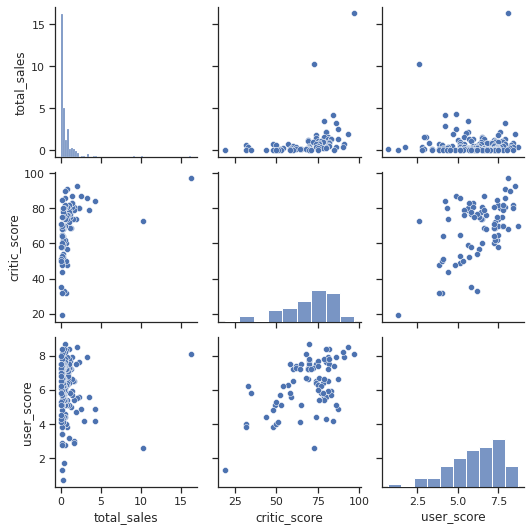

In [37]:
#Separando los datos relevantes para la X360
x360_data_2013 =  data_filtered[data_filtered['platform']=='X360']
#Separando los datos a comparar
x360_scatter = x360_data_2013[['total_sales','critic_score','user_score']]
#Generando grafico de disperción
sns.pairplot(x360_scatter)
plt.show()

In [38]:
#Calculando coeficiente de correalción de las columnas para X360
x360_scatter.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


Podemos ver que para la `X360` también existe una correlación entre las criticas de profesionales y las ventas totales, mientras que la correlacion con las criticas de usuarios no tiene correlación clara.

### **Distribución de ventas por genero**

In [39]:
#Agrupamos nuestros datos por genero
games_by_genre= data_filtered.groupby('genre')[['name', 'total_sales']].agg({'name': 'count', 'total_sales': 'sum'})
#Calculando la proporcion de ventas por juego
games_by_genre['sales_per_game']= games_by_genre['total_sales']/games_by_genre['name']
games_by_genre.sort_values(by='sales_per_game', ascending= False).reset_index()

,genre,name,total_sales,sales_per_game
0,Shooter,187,232.98,1.245882
1,Sports,214,150.65,0.703972
2,Platform,74,42.63,0.576081
3,Role-Playing,292,145.89,0.499623
4,Racing,85,39.89,0.469294
5,Fighting,80,35.31,0.441375
6,Action,769,322.50,0.419376
7,Misc,156,63.06,0.404231
8,Simulation,62,21.76,0.350968
9,Puzzle,17,3.17,0.186471


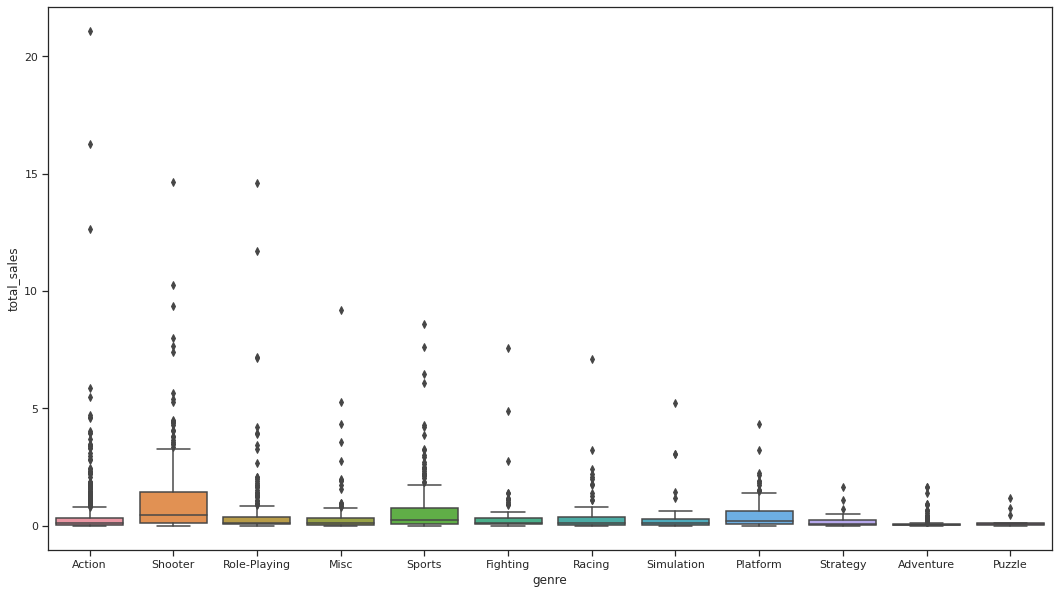

In [40]:
fig, axes = plt.subplots(figsize=(18, 10))
ax=sns.boxplot(x='genre', y='total_sales', data=data_filtered)
plt.show()

De la tabla y boxplot podemos concluir que el genero más rentable es `Shooter`, ya que tiene una mayor cantidad de ventas por juego por mucha diferencia. Tiene valores atípicos a considerar pero no son una cantidad muy grande como lo es para `Action` que tiene valores atípicos muy altos, que a pesar de ello y la gran cantidad de juegos de ese genero, no es muy rentable. 

El segundo genero más rentable es `Sports`, seguido de `Platform` del cuál no podemos generalizar ya que tiene una cantidad menor de juegos y sería ideal tener una muestra mayor para decirlo con seguridad.

### **Conclusión del análisis**

En el análisis exploratorio de datos hemos recopilado una buena cantidad de información sobre nuestros datos. Observamos cuántos juegos se lanzaron a través de los años y parece que en 2008 y 2009 se produjo la mayor cantidad de juegos. Notamos que los datos comenzaron a crecer notablemente en 1994, antes de que hubiera menos de 100 juegos anuales y después de 1994 ese número de juegos que fueron lanzados anualmente comenzó a aumentar y a veces duplicándose cada año. Después de 2008, hubo una tendencia decreciente de lanzamientos de juegos por año que se estabilizó entre 500-600 juegos en los últimos años de 2013 a 2016.

En todos los gráficos de nuestras plataformas había una distribución visible de ascenso y descenso gradual en el periodo de 10 años. Por ejemplo, `PS2` solía ser la plataforma más popular a principios de 2000, ya que su distribución parecía ser la más estable a lo largo de los años hasta que alcanzó su maximo de ventas entre 2002 y 2004.

En 2005 salió la `X360` y en 2006 la `Wii` y la `PS3`, que empezaron a ganar popularidad. Poco a poco, las ventas de `PS2` comenzaron a bajar y en 2010 las ventas de `X360` estaban disminuyendo e insinuando que había otra plataforma que estaba ganando popularidad, que era la `PS3`. Entonces vimos que la vida útil de nuestras plataformas líderes es de unos 10 años y que alcanzan su punto máximo en términos de beneficios a mediados de su vida útil, unos 5-6 años. 

Sabíamos que la vida útil media de una plataforma es de 6 años, pero como hemos visto en nuestros datos, las plataformas líderes tardan entre 5 y 6 años en alcanzar su límite de beneficios. Así que filtramos los datos a un año mínimo de 2013 con el fin de centrarnos en cualquier plataforma que estuviera en alza y pudiera ser rentable en 2017.

A continuación, excluimos las plataformas que han superado su límite de beneficios para centrarnos únicamente en las plataformas que todavía pueden seguir creciendo en 2017. En general, la diferencia de ventas fue significativa y las únicas plataformas rentables que se presentaron en los datos fueron `X360`, `PS4`, `XOne` y `Wii`.

Seleccionamos las plataformas que nos interesan como la `PS4` y `XOne`, que son aquellas con potencial para ser las plataformas éxitosas para el 2017. Vimos que el valor medio de `XOne` fue superior a la media de `PS4`, pero el rango de cuartiles de `PS4` es ligeramente inferior al de `XOne`.

Curiosamente, encontramos que existe una correlación entre la puntuación de los críticos y las ventas totales. Lo que sugiere que las críticas profesionales tienen un efecto en las ventas totales de juegos para las plataformas que elegimos, pero las críticas de los usuarios no tenían ninguna correlación clara con las ventas totales, al parecer no es un factor a considerar al momento de comprar un juego de estas plataformas.

Tras analizar los datos mediante gráficos de caja que comparan las ventas totales y los géneros, podemos afirmar que el género más popular `Action`, pero sorprendentemente está en el puesto 6 de los juegos más rentables. El genero más rentable con diferenecia fue `Shooter`, seguido de `Sports `ya que obtuvieron los mejores ratios de ventas por juego y una cantidad considerable de juegos de esos tipos.

Como conclusión de los datos que hemos observado a través de estos gráficos, sugerimos que los géneros deportivos y de disparos son los que tienen mayor potencial de beneficios entre los géneros, ya que no tienen un elevado número de juegos, pero sí un elevado beneficio.


## **Crear un perfil de usuario para cada región**

Necesitamos identificar que tipo de perfil tiene cada region, para ello realizaremos:
* Para cada región (NA, UE, JP) determinaremos:
  * Las cinco plataformas principales. Describir las variaciones en sus cuotas de mercado de una región a otra.
  * Los cinco géneros principales. Explica la diferencia.
  * Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### **Creando un perfil para NA**

* Cinco plataformas principales en NA

          total_sales  na_sales
platform                       
PS4            314.14    108.74
XOne           159.32     93.12
X360           136.80     81.66
PS3            181.43     63.50
3DS            143.25     38.20


<AxesSubplot:ylabel='na_sales'>

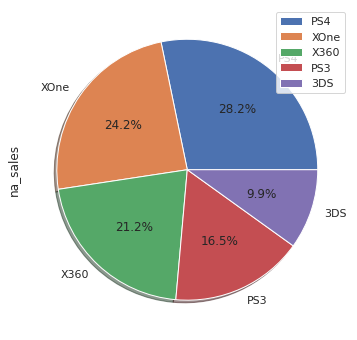

In [41]:
#Generando tabla de ventas por plataforma en NA
na_platform_profile = data_filtered.groupby(['platform'])['total_sales','na_sales'].sum().sort_values(by='na_sales',ascending=False)
na_platform_profile = na_platform_profile.head(5)
print(na_platform_profile)
#Graficando ventas por plataforma en un grafico de pie
na_platform_profile.plot(kind='pie',y='na_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

* Cinco generos principales en NA

              total_sales  na_sales
genre                              
Action             322.50    126.13
Shooter            232.98    109.74
Sports             150.65     65.27
Role-Playing       145.89     46.40
Misc                63.06     27.49


<AxesSubplot:ylabel='na_sales'>

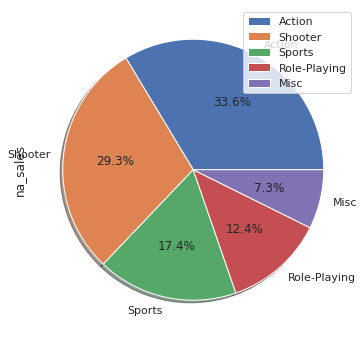

In [42]:
#Generando tabla de ventas por genero en NA
na_genre_profile = data_filtered.groupby(['genre'])['total_sales','na_sales'].sum().sort_values(by='na_sales',ascending=False)
na_genre_profile = na_genre_profile.head(5)
print(na_genre_profile)
#Graficando ventas por genero en un grafico de pie
na_genre_profile.plot(kind='pie',y='na_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

* Clasificacion ESRB vs ventas en NA.

         total_sales  na_sales
rating                        
M             372.31    165.29
unknown       277.08     89.42
E             200.16     79.05
E10+          115.39     54.24
T             126.62     49.79


<AxesSubplot:ylabel='na_sales'>

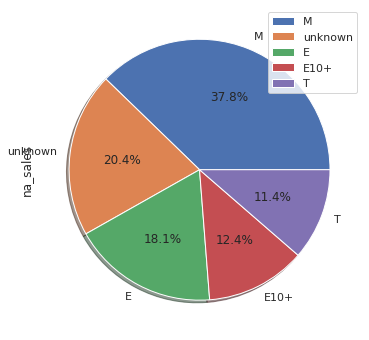

In [43]:
#Generando tabla de ventas por Clasificacion
na_rating_profile = data_filtered.groupby(['rating'])['total_sales','na_sales'].sum().sort_values(by='na_sales',ascending=False)
print(na_rating_profile)
#Graficando ventas por clasificacion en un grafico de pie
na_rating_profile.plot(kind='pie',y='na_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

El perfil de la región NA:

* La plataforma más popular para este perfil es `PS4`, seguida de `XOne` y `X360`.

* La mayoría de las ventas de este perfil corresponden a juegos del género `Action` y `Shooter`.

* La clasificación de sus juegos más populares es M.



---



### **Creando un perfil para EU**

* Cinco plataformas principales en EU

          total_sales  eu_sales
platform                       
PS4            314.14    141.09
PS3            181.43     67.81
XOne           159.32     51.59
X360           136.80     42.52
3DS            143.25     30.96


<AxesSubplot:ylabel='eu_sales'>

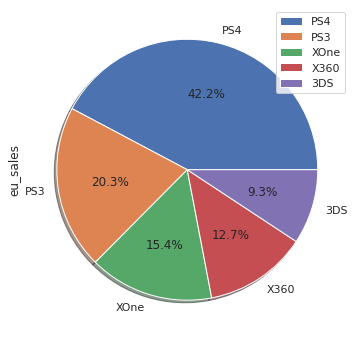

In [44]:
#Generando tabla de ventas por plataforma en NA
eu_platform_profile = data_filtered.groupby(['platform'])['total_sales','eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
eu_platform_profile = eu_platform_profile.head(5)
print(eu_platform_profile)
#Graficando ventas por plataforma en un grafico de pie
eu_platform_profile.plot(kind='pie',y='eu_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

* Cinco generos principales en EU

              total_sales  eu_sales
genre                              
Action             322.50    118.61
Shooter            232.98     87.86
Sports             150.65     60.52
Role-Playing       145.89     36.97
Racing              39.89     20.19


<AxesSubplot:ylabel='eu_sales'>

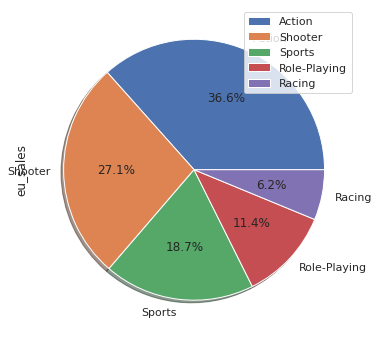

In [45]:
#Generando tabla de ventas por genero en EU
eu_genre_profile = data_filtered.groupby(['genre'])['total_sales','eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
eu_genre_profile = eu_genre_profile.head(5)
print(eu_genre_profile)
#Graficando ventas por genero en un grafico de pie
eu_genre_profile.plot(kind='pie',y='eu_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

* Clasificacion ESRB vs ventas en EU.

         total_sales  eu_sales
rating                        
M             372.31    145.80
E             200.16     83.36
unknown       277.08     78.91
E10+          115.39     42.69
T             126.62     41.95


<AxesSubplot:ylabel='eu_sales'>

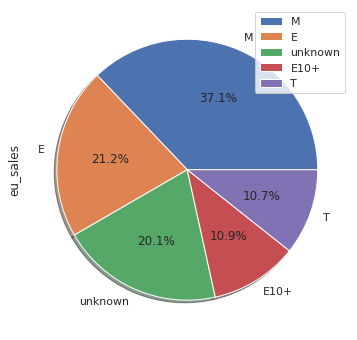

In [46]:
#Generando tabla de ventas por Clasificacion
eu_rating_profile = data_filtered.groupby(['rating'])['total_sales','eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
print(eu_rating_profile)
#Graficando ventas por clasificacion en un grafico de pie
eu_rating_profile.plot(kind='pie',y='eu_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

El perfil de la región de la EU:

*La plataforma más popular para este perfil es `PS4`, seguida de `PS3` y `XOne`.

* La mayoría de las ventas de este perfil corresponden a juegos del género `Action` y `Shooter`.

* La clasificación de sus juegos más populares es `M`.

Los perfiles NA y EU son muy similares en todos los parámetros seleccionados.



---



### **Creando un perfil para JP**

* Cinco plataformas principales en JP

          total_sales  jp_sales
platform                       
3DS            143.25     67.81
PS3            181.43     23.35
PSV             32.99     18.59
PS4            314.14     15.96
WiiU            64.63     10.88


<AxesSubplot:ylabel='jp_sales'>

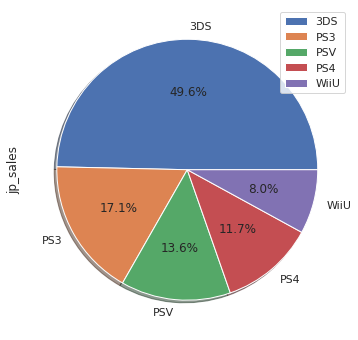

In [47]:
#Generando tabla de ventas por plataforma en JP
jp_platform_profile = data_filtered.groupby(['platform'])['total_sales','jp_sales'].sum().sort_values(by='jp_sales',ascending=False)
jp_platform_profile = jp_platform_profile.head(5)
print(jp_platform_profile)
#Graficando ventas por plataforma en un grafico de pie
jp_platform_profile.plot(kind='pie',y='jp_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

* Cinco generos principales en JP

              total_sales  jp_sales
genre                              
Role-Playing       145.89     51.04
Action             322.50     40.49
Misc                63.06      9.44
Fighting            35.31      7.65
Shooter            232.98      6.61


<AxesSubplot:ylabel='jp_sales'>

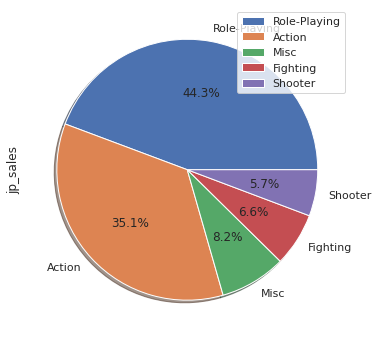

In [48]:
#Generando tabla de ventas por genero en EU
jp_genre_profile = data_filtered.groupby(['genre'])['total_sales','jp_sales'].sum().sort_values(by='jp_sales',ascending=False)
jp_genre_profile = jp_genre_profile.head(5)
print(jp_genre_profile)
#Graficando ventas por genero en un grafico de pie
jp_genre_profile.plot(kind='pie',y='jp_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

* Clasificacion ESRB vs ventas en JP.

         total_sales  jp_sales
rating                        
unknown       277.08     85.29
T             126.62     20.59
E             200.16     15.14
M             372.31     14.11
E10+          115.39      5.89


<AxesSubplot:ylabel='jp_sales'>

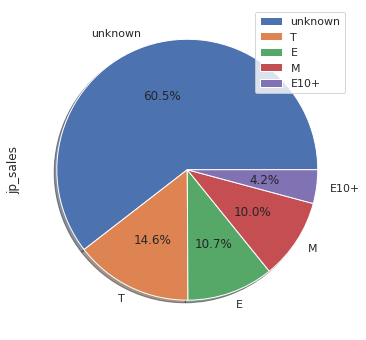

In [49]:
#Generando tabla de ventas por Clasificacion
jp_rating_profile = data_filtered.groupby(['rating'])['total_sales','jp_sales'].sum().sort_values(by='jp_sales',ascending=False)
print(jp_rating_profile)
#Graficando ventas por clasificacion en un grafico de pie
jp_rating_profile.plot(kind='pie',y='jp_sales', shadow = True, figsize=(8,6),autopct='%1.1f%%')

El perfil de la región JP:

* La plataforma más popular para este perfil es la `3DS`, seguida de la `PS3`.

* La mayoría de las ventas de este perfil corresponden a `Role-Playing` y `Action`.

* Hay un gran número de valores desconocidos en la columna de clasificación que podrían indicar que Japón usa un sistema de clasificación diferente para los juegos.

* La clasificación de sus juegos más populares es `T`.

* Este perfil es muy diferente de los otros dos. Sin tener en cuenta su menor cuota de ventas, varía en todos los parámetros seleccionados con respecto a los otros perfiles.



---



### **Conclusión**

En este paso creamos un perfil de usuario para las regiones: NA, UN y JP.

Tras comparar los 3 perfiles de usuario en dataframes y graficos de pie llegamos a las conclusiones de que:

* Los perfiles NA y UE son similares en las preferencias: Las plataformas `PS4` y `XOne`, de género `Action` y `Shooter` y las clasificaciones ESRB `M`.
* El perfil de JP difiere de NA y UE en todo, ya que prefiere la plataforma `3DS`, los juegos `Role-Playing` y para la clasificación `T` de la ESRB.
* Japón presenta un número notablemente elevado de valores desconocidos en la columna de género en comparación con las demás regiones, lo que podría sugerir un sistema diferente de clasificación de juegos exclusivo para esta región.


## **Prueba de hipótesis**

Se nos presentan dos hipotesis para nuestros datos:

1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

En este punto probaremos ambas hipotesis usando un umbral alfa de 0.05:

### **Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

Comenzaremos separando la data que necesitamos del DataFrame original:

In [50]:
xone = data[(data.platform == 'XOne')  & (data.user_score.notna())]['user_score'].astype(float)
pc = data[(data.platform == 'PC')  & (data.user_score.notna())]['user_score'].astype(float)

Antes de comenzar a realizar nuestro procedimiento para validar las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas, validaremos si la varianza de las calificaciones para ambas plataformas varían, de esta forma podremos aplicar con mayor certeza nuestro t-test. Usaremos una prueba levene con los siguientes parametros:

$$H_0: \text{La varianza de las calificaciones para ambas plataformas no difiere.}$$
$$H_1: \text{La varianza de las calificaciones para ambas plataformas difiere.}$$
$$alpha: \text{5%}$$


In [51]:
#importamos levene
from scipy.stats import levene

alpha = 0.05 # significación estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

stat, results= levene(xone, pc)

print('p-value:', results)

if (results < alpha):
        print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

p-value: 0.2839056622829332
No rechazamos la hipótesis nula


No se rechaza la hipótesis nula , por lo que la varianza de las calificaciones para ambas plataformas no difiere. Procedamos a usar esta información en nuestro t-test:

$$H_0: \text{Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.}$$
$$H_1: \text{Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas}$$
$$alpha: \text{5%}$$
$$equal var = \text{True}$$

Empezamos con la hipótesis nula H₀ que es que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. La hipótesis alternativa, H₁ es que las calificaciones promedio de los usuarios de ambas plataformas difieren. Para ello, utilizaremos un alfa de 0,05, lo que significa que sólo en el 5% de los casos rechazaremos la hipótesis nula cuando sea cierta. Sabemos además que la varianza de ambas muestras es igual por lo que el parametro equal_var será igual a True.


In [52]:
alpha = 0.05 # significación estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = stats.ttest_ind(xone, pc, equal_var=True)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.1488002807200714e-05
Rechazamos la hipótesis nula


Tras someter nuestra muestra de datos a la prueba con un nivel de significación estadística de 0,05, se ha rechazado nuestra hipótesis sobre la igualdad de los promedios de las muestras pareadas y las calificaciones promedio de los usuaeios para las plataformas Xbox One y PC no son las mismas.



---



### **Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**


Comenzaremos separando la data que necesitamos del DataFrame original:

In [53]:
action = data[(data['genre'] == 'Action') & (data.user_score.notna())]['user_score'].astype(float)
sports = data[(data['genre'] == 'Sports') & (data.user_score.notna())]['user_score'].astype(float)

Antes de comenzar a realizar nuestro procedimiento para validar si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes, validaremos si la varianza de las calificaciones para ambos generos varían, de esta forma podremos aplicar con mayor certeza nuestro t-test. Usaremos una prueba levene con los siguientes parametros:

$$H_0: \text{La varianza de las calificaciones de los usuarios para los géneros de Acción y Deportes no difiere.}$$
$$H_1: \text{La varianza de las calificaciones de los usuarios para los géneros de Acción y Deportes difiere.}$$
$$alpha: \text{5%}$$

In [54]:
alpha = 0.05 # significación estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

stat, results = levene(action, sports)

print('p-value:', results)

if (results < alpha):
        print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

p-value: 0.00012737877390417462
Rechazamos la hipótesis nula


Se rechaza la hipótesis nula sobre la igualdad de varianzas para las calificaciones de los usuarios para los géneros de Acción y Deportes, por lo que hay una diferencia considerable entre la dispersion de los datos para ambos casos. Con esto podemos proceder a realizar un t-test a nuestros datos y determinar la hipotesis:

$$H_0: \text{Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales}$$
$$H_1: \text{Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes}$$
$$alpha: \text{5%}$$
$$equal var = \text{False}$$

Veamos los pasos para probar la segunda hipótesis. Empezamos con la hipótesis nula H₀ que son las calificaciones promedio de los usuarios para los géneros son iguales. La hipótesis alternativa, H₁ es que las calificaciones promedio de los usuarios para los géneros son diferentes. Para ello, utilizaremos un alfa de `0,05`, lo que significa que sólo en el 5% de los casos rechazaremos la hipótesis nula cuando sea cierta. Sabemos además que la varianza de ambas muestras no es igual por lo que el parametro `equal_var` será igual a `False`.

In [55]:
alpha = 0.05 # significación estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = stats.ttest_ind(action, sports,equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.08991887133875968
No rechazamos la hipótesis nula


Tras someter nuestra muestra de datos a un t-test con un nivel de significación estadística de 0,05, nuestra hipótesis sobre la igualdad de las medias de muestras emparejadas fue que no rechazamos la hipótesis nula, ya que las valoraciones medias de los usuarios del género de acción son iguales a las valoraciones medias de los usuarios del género de deportes dentro del 95% de la muestra seleccionada.

## **Conclusión general**

En este proyecto se nos asignó un conjunto de datos que cubre las ventas históricas de juegos de una fuente abierta. Nuestro objetivo era identificar los patrones que determinan si un juego tiene éxito o no con el fin de permitirnos detectar posibles proyectos prometedores y planificar campañas publicitarias para el próximo año 2017.

Tras analizar y observar los datos, realizamos varias conclusiones que desarrollamos en 5 pasos.

1. Inicialización

  En este paso hemos echado un primer vistazo a los datos. Los datos constaban de 16715 y 11 columnas. Había una gran cantidad de valores perdidos en algunas columnas, algunos de los cuales no podíamos omitir debido a su gran cantidad.

2. Preparar los datos

  En este paso sustituimos los nombres de las columnas por letras minúsculas para mantener la homogeneidad de estas. A continuación, tratamos los valores ausentes en las columnas `name`, `genre` y `year_of_release`. En las columnas de valoración debido a la cantidad y la falta de una base de datos anexa para reemplazar los valores ausentes, no los modificamos ni eliminamos. Cambiamos el valor TBD a NaN en las columnas `year_of_release` y `user_score` para eliminar todos los textos de esas columnas y cambiar los tipos de las columnas sin problema. Finalmente enriquecimos nuestros datos creando una nueva columna que calcula las ventas totales de cada juego, la hemos llamado `total_sales`.

3. Analizar los datos

  En el análisis exploratorio de datos hemos recopilado una buena cantidad de información sobre nuestros datos. Observamos cuántos juegos se lanzaron a través de los años y parece que en 2008 y 2009 se produjo la mayor cantidad de juegos. Notamos que los datos comenzaron a crecer notablemente en 1994, antes de que hubiera menos de 100 juegos anuales y después de 1994 ese número de juegos que fueron lanzados anualmente comenzó a aumentar y a veces duplicándose cada año. Después de 2008, hubo una tendencia decreciente de lanzamientos de juegos por año que se estabilizó entre 500-600 juegos en los últimos años de 2013 a 2016.

  En todos los gráficos de nuestras plataformas había una distribución visible de ascenso y descenso gradual en el periodo de 10 años. Por ejemplo, `PS2` solía ser la plataforma más popular a principios de 2000, ya que su distribución parecía ser la más estable a lo largo de los años hasta que alcanzó su maximo de ventas entre 2002 y 2004.

  En 2005 salió la `X360` y en 2006 la `Wii` y la `PS3`, que empezaron a ganar popularidad. Poco a poco, las ventas de `PS2` comenzaron a bajar y en 2010 las ventas de `X360` estaban disminuyendo e insinuando que había otra plataforma que estaba ganando popularidad, que era la `PS3`. Entonces vimos que la vida útil de nuestras plataformas líderes es de unos 10 años y que alcanzan su punto máximo en términos de beneficios a mediados de su vida útil, unos 5-6 años. 

  Sabíamos que la vida útil media de una plataforma es de 6 años, pero como hemos visto en nuestros datos, las plataformas líderes tardan entre 5 y 6 años en alcanzar su límite de beneficios. Así que filtramos los datos a un año mínimo de 2013 con el fin de centrarnos en cualquier plataforma que estuviera en alza y pudiera ser rentable en 2017.

  A continuación, excluimos las plataformas que han superado su límite de beneficios para centrarnos únicamente en las plataformas que todavía pueden seguir creciendo en 2017. En general, la diferencia de ventas fue significativa y las únicas plataformas rentables que se presentaron en los datos fueron `X360`, `PS4`, `XOne` y `Wii`.

  Seleccionamos las plataformas que nos interesan como la `PS4` y `XOne`, que son aquellas con potencial para ser las plataformas éxitosas para el 2017. Vimos que el valor medio de `XOne` fue superior a la media de `PS4`, pero el rango de cuartiles de `PS4` es ligeramente inferior al de `XOne`.

  Curiosamente, encontramos que existe una correlación entre la puntuación de los críticos y las ventas totales. Lo que sugiere que las críticas profesionales tienen un efecto en las ventas totales de juegos para las plataformas que elegimos, pero las críticas de los usuarios no tenían ninguna correlación clara con las ventas totales, al parecer no es un factor a considerar al momento de comprar un juego de estas plataformas.

  Tras analizar los datos mediante gráficos de caja que comparan las ventas totales y los géneros, podemos afirmar que el género más popular `Action`, pero sorprendentemente está en el puesto 6 de los juegos más rentables. El genero más rentable con diferenecia fue `Shooter`, seguido de `Sports `ya que obtuvieron los mejores ratios de ventas por juego y una cantidad considerable de juegos de esos tipos.

  Como conclusión de los datos que hemos observado a través de estos gráficos, sugerimos que los géneros deportivos y de disparos son los que tienen mayor potencial de beneficios entre los géneros, ya que no tienen un elevado número de juegos, pero sí un elevado beneficio.


4. Crear un perfil de usuario para cada región

  En este paso hicimos un perfil de usuario para las regiones: NA, UN y JP.

  Tras comparar los 3 perfiles de usuario en dataframes y graficos de pie llegamos a las conclusiones de que los perfiles NA y UE son similares en las preferencias: Las plataformas `PS4` y `XOne`, de género `Action` y `Shooter` y las clasificaciones ESRB `M`.El perfil de JP difiere de NA y UE en todo, ya que prefiere la plataforma `3DS`, los juegos `Role-Playing` y para la clasificación `T` de la ESRB. Japón además presenta un número notablemente elevado de valores desconocidos en la columna de género en comparación con las demás regiones, lo que podría sugerir un sistema diferente de clasificación de juegos exclusivo para esta región.

5. Prueba de hipótesis

 Para la primera hipótesis: "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas". Tras someter nuestra muestra de datos a un t-test con un nivel de significación estadística de 0,05, nuestra hipótesis sobre la igualdad de las medias de muestras pareadas fue que rechazamos la hipótesis nula, ya que las valoraciones medias de los usuarios de la plataforma Xbox One no son iguales a las valoraciones medias de los usuarios de la plataforma PC en el 95% de la muestra seleccionada.

 Para la segunda hipótesis: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes." Tras someter nuestra muestra de datos a un t-test con un nivel de significación estadística de 0,05, nuestra hipótesis sobre la igualdad de las medias de muestras pareadas fue que no rechazamos la hipótesis nula, ya que las calificaciones promedio de ambos generos son iguales en el 95% de la muestra seleccionada.


**Recomendaciones para la campaña del 2017**

* Centrar las campañas para las plataformas `PS4` y `XOne` para maximizar las ventas.
* Validar las reseñas de expertos es importante para saber el éxito de un juego.
* Centrar las campañas en los generos `Shooter` y `Sports` para maximizar las ventas.
* Es posible unificar las campañas para las regiones de NA y EU ya que tienen intereses muy similares, centrarse en las plataformas `PS4` y `XOne`, género `Action` y `Shooter` y de clasificacion ESRB `M`.
* En el caso de JP centrar las campañas en la plataforma `3DS`, los juegos `Role-Playing` y considerar investigar más a profundidad el sistema de clasificaciones dominante en Japón.
